### Basics of Pytorch

- All Imports are in this cell

In [127]:
import torch
import torchvision
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt


In [128]:
# Some example matrices for matrix multiplication in numpy

x = [[1, 2, 3], [4, 5, 6], [7, 8, 9]] # 3x3 matrix
y = [[3] , [2] , [1]] # 3x1 matrix

np_x = np.array(x)
np_y = np.array(y)

print(f"Matrix multiplication in numpy: \n {np.matmul(np_x, np_y)}")

Matrix multiplication in numpy: 
 [[10]
 [28]
 [46]]


In [129]:
x_tensor = torch.FloatTensor(x)
y_tensor = torch.FloatTensor(y)

b_torch = torch.ones(3, 1) # 3x1 matrix of ones

print(f"Matrix multiplication and b_torch addition in pytorch: \n {torch.matmul(x_tensor, y_tensor) + b_torch}")

Matrix multiplication and b_torch addition in pytorch: 
 tensor([[11.],
        [29.],
        [47.]])


In [130]:
y = torch.rand(3 , 2 , 3 , 1)
print(y)   # 4D tensor i.e 3 matrices of 2 x 3 x 1


print(f"Minimum value of tensor is : " , y.min())  # gives minimum value in whole tensor i.e global minimum

tensor([[[[0.0469],
          [0.8324],
          [0.0395]],

         [[0.1233],
          [0.6795],
          [0.2315]]],


        [[[0.1843],
          [0.1978],
          [0.5058]],

         [[0.2620],
          [0.1753],
          [0.4642]]],


        [[[0.5131],
          [0.6250],
          [0.6681]],

         [[0.2510],
          [0.6341],
          [0.6418]]]])
Minimum value of tensor is :  tensor(0.0395)


In [131]:
x = torch.ones(2, 3)

print(x * 10 + 3)  # broadcasting in pytorch

tensor([[13., 13., 13.],
        [13., 13., 13.]])


In [132]:
x_tensor.reshape(1, 9)  # reshaping tensor to 1x9 from 2x3

tensor([[1., 2., 3., 4., 5., 6., 7., 8., 9.]])

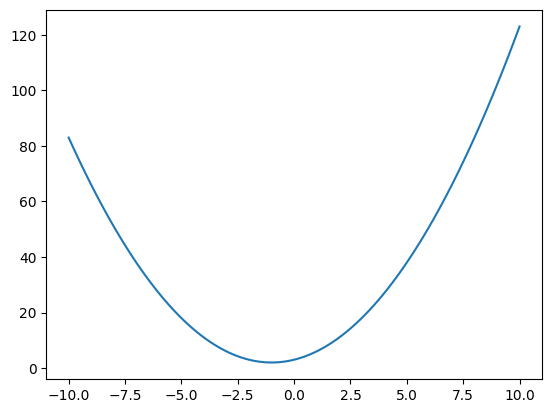

In [133]:
fx = lambda x : x**2 + 2*x + 3

x = np.linspace(-10, 10 , 100)

plt.plot(x , fx(x))

In [134]:
x_ = torch.randn(1 , requires_grad=True)  # A random number tensor
y_ = fx(x_)
y_.backward()
grad_x_ = x_.grad.item()
print(f"When x = {x_.item()} , then grad of fx at x is {grad_x_}")


When x = 0.1742197722196579 , then grad of fx at x is 2.3484394550323486


In [142]:
# Gradient descent Implementation in pytorch

def fx(x):
    return x**2 + 3*x + 2  # Example: a simple quadratic

x_ = torch.randn(1 , requires_grad=True)  # A random number tensor
learning_rate = 0.01
n_iters = 0
x_logger = []
y_logger = []
dy_dx = 100000  # just a large value to start with

while np.abs(dy_dx) > 0.001 :
    y_ = fx(x_)
    y_.backward()
    dy_dx = x_.grad.item()
    with torch.no_grad():
        x_ -= learning_rate * dy_dx
        x_logger.append(x_.item())
        y_logger.append(y_.item())
        x_.grad.zero_()  # setting gradient to zero after every step
    n_iters += 1

print(f"Minimum value of fx is at x = {x_.item()} , fx = {fx(x_).item()} after {n_iters} iterations with gradient of {dy_dx}")

Minimum value of fx is at x = -1.499517798423767 , fx = -0.2499997615814209 after 436 iterations with gradient of 0.00098419189453125
